In [92]:
#Importing Modules

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


In [84]:
def Calculate_Integral_Image(img):
        h, w = len(img), len(img[0])
        integral_image = np.array([[0 for y in range(w)] for x in range(h)])
        
        for y in range(0, h):
            s = 0
            
            for x in range(0, w):
                s += img[y][x]
                integral_image[y][x] = s
                
                if y > 0:
                    integral_image[y][x] += integral_image[y-1][x]
        return integral_image

In [86]:
def Calculate_Local_Sum(ii, P0: tuple[float, float], P1: tuple[float, float]):

    bottom_right    = ii[int(P1[0])][int(P1[1])]
    bottom_left     = ii[int(P1[0])][int(P0[1])-1] if int(P0[1]) >= 1 else 0
    top_right       = ii[int(P0[0])-1][int(P1[1])] if int(P0[0]) >= 1 else 0
    top_left        = ii[int(P0[0])-1][int(P0[1])-1] if int(P0[1]) >= 1 and int(P0[0]) >=1 else 0
  
    return bottom_right - bottom_left - top_right + top_left
  

In [87]:
def DetectEye(ii, kernel_width):
    max_score = -1
    max_coordinate_position = (-1, -1)
    h,w= ii.shape

    for i in range(int(np.ceil(kernel_width * 0.075)), h - int(np.floor(kernel_width * 0.3))):
        for j in range(int(np.ceil(kernel_width*0.5)), w - int(np.floor(kernel_width*0.5))):

            p1 =  (i - 0.075 * kernel_width, j - 0.5   * kernel_width) 
            p2 =  (i , j - 0.05  * kernel_width)
            p3 =  (i , j - 0.5   * kernel_width)
            p4 =  (i + 0.075 * kernel_width, j - 0.05  * kernel_width)
            p5 =  (i - 0.075 * kernel_width, j + 0.05  * kernel_width)
            p6 =  (i , j + 0.5   * kernel_width)
            p7 =  (i, j + 0.05  * kernel_width)
            p8 =  (i + 0.075 * kernel_width, j + 0.5   * kernel_width)
            p9 =  (i + 0.125 * kernel_width, j - 0.325 * kernel_width)
            p10 = (i + 0.3   * kernel_width, j - 0.225 * kernel_width)
            p11 = (i + 0.125 * kernel_width, j - 0.1   * kernel_width)
            p12 = (i + 0.3   * kernel_width, j + 0.1   * kernel_width)
            p13 = (i + 0.125 * kernel_width, j + 0.225 * kernel_width)
            p14 = (i + 0.3   * kernel_width, j + 0.325 * kernel_width)

            LS1 = Calculate_Local_Sum(ii, p1, p2)
            LS2 = Calculate_Local_Sum(ii, p3, p4)
            LS3 = Calculate_Local_Sum(ii, p5, p6)
            LS4 = Calculate_Local_Sum(ii, p7, p8)
            LS5 = Calculate_Local_Sum(ii, p9, p10)
            LS6 = Calculate_Local_Sum(ii, p11, p12)
            LS7 = Calculate_Local_Sum(ii, p13, p14)

            score = LS1 - LS2 + LS3 - LS4 - LS5 + LS6 - LS7 

            if score > max_score:
                max_score = score
                max_coordinate_position = (i,j)

    return max_coordinate_position

In [89]:
def Extract_Detected_Eye(img,max_coordinate_position,kernel_width):
    final_image=np.zeros_like(img)

    y1 = max_coordinate_position[0] - round((0.15*kernel_width)/2)
    y2 = max_coordinate_position[0] + round((0.15*kernel_width)*2)
    x1 = max_coordinate_position[1] - round(kernel_width/2)
    x2 = max_coordinate_position[1] + round(kernel_width/2)

    for i in range(y1,y2):
        for j in range(x1,x2):
            final_image[i][j]=img[i][j]
      
    return final_image

In [ ]:
#Testing

Text(0.5, 1.0, 'Third')

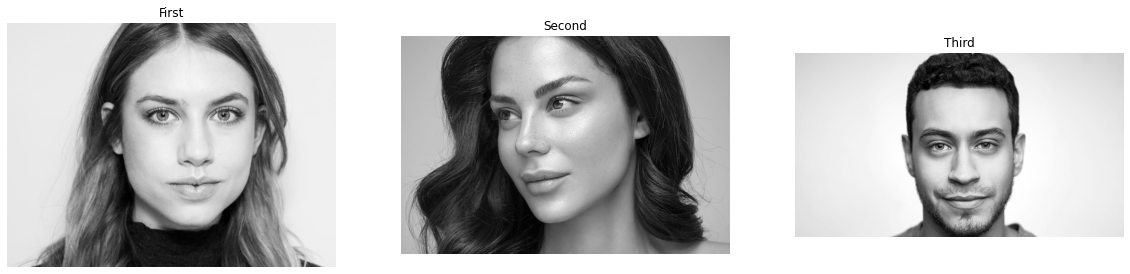

In [96]:
# load the images
imageData1 = Image.open('f2.png')
imageData2 = Image.open('f6.jpg')
imageData3 = Image.open('f3.jpg')

# convert images to numpy array
imageGrey1 = imageData1.convert('L')
imageGrey2 = imageData2.convert('L')
imageGrey3 = imageData3.convert('L')

image_female_1=np.asarray(imageGrey1,dtype='int64')
image_female_2=np.asarray(imageGrey2,dtype='int64')
image_male=np.asarray(imageGrey3,dtype='int64')


fig = plt.figure(figsize=(20, 20))  
# setting values to rows and column variables
rows = 1
columns = 3

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(image_female_1,cmap='gray')
plt.axis('off')
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(image_female_2,cmap='gray')
plt.axis('off')
plt.title("Second")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(image_male,cmap='gray')
plt.axis('off')
plt.title("Third")

#plt.imshow(Calculate_Integral_Image(image),cmap='gray')

Text(0.5, 1.0, 'Third')

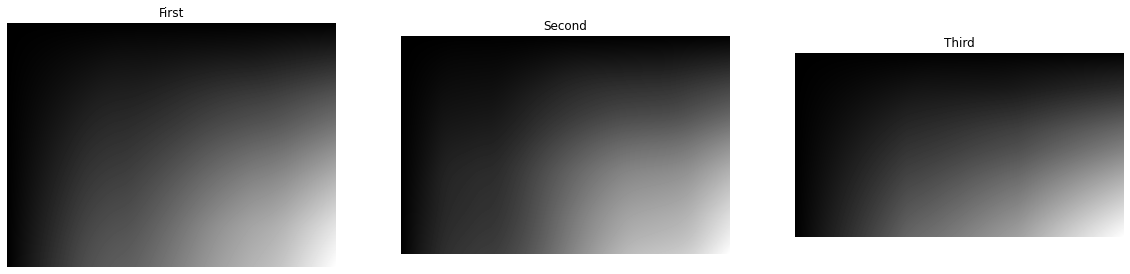

In [103]:
#Calculating the integral Image
ii_female_1=Calculate_Integral_Image(image_female_1)
ii_female_2=Calculate_Integral_Image(image_female_2)
ii_male=Calculate_Integral_Image(image_male)


fig= plt.figure(figsize=(20, 20))  
# setting values to rows and column variables
rows = 1
columns = 3

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(ii_female_1,cmap='gray')
plt.axis('off')
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(ii_female_2,cmap='gray')
plt.axis('off')
plt.title("Second")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(ii_male,cmap='gray')
plt.axis('off')
plt.title("Third")


In [104]:
#Detecting Eyes
female_eye_1_max_coordinate_position = DetectEye(ii_female_1, 330)
female_eye_2_max_coordinate_position = DetectEye(ii_female_2, 150)
male_eye_max_coordinate_position     = DetectEye(ii_male, 250)

print('female_eye_1_max_coordinate_position:'  , female_eye_1_max_coordinate_position, 
      '\nfemale_eye_2_max_coordinate_position:', female_eye_2_max_coordinate_position, 
      '\nmale_eye_max_coordinate_position:'  , male_eye_max_coordinate_position)



female_eye_1_max_coordinate_position: (220, 566) 
female_eye_2_max_coordinate_position: (89, 202) 
male_eye_max_coordinate_position: (241, 524)


Text(0.5, 1.0, 'Third')

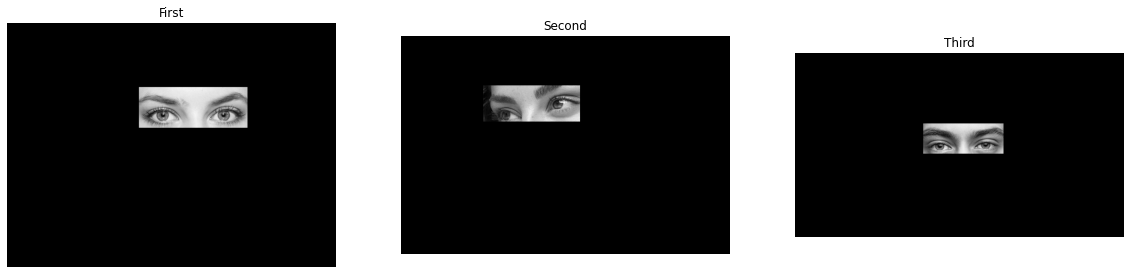

In [106]:
female_eye_1 = Extract_Detected_Eye(image_female_1, female_eye_1_max_coordinate_position, 330)
female_eye_2 = Extract_Detected_Eye(image_female_2, female_eye_2_max_coordinate_position, 150)
male_eye   = Extract_Detected_Eye(image_male  , male_eye_max_coordinate_position  , 250)

fig= plt.figure(figsize=(20, 20))  
# setting values to rows and column variables
rows = 1
columns = 3

# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)

# showing image
plt.imshow(female_eye_1,cmap='gray')
plt.axis('off')
plt.title("First")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(female_eye_2,cmap='gray')
plt.axis('off')
plt.title("Second")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(male_eye,cmap='gray')
plt.axis('off')
plt.title("Third")
